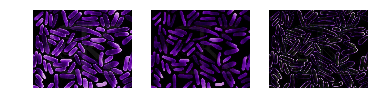

In [2]:
%matplotlib inline
#17.1 用分水岭算法实现图像分割与提取
#使用形态学变换获取一幅图像的边界信息
import cv2
import numpy as np
from matplotlib import pyplot as plt
o=cv2.imread("border.jpg",-1)
k=np.ones((5,5),np.uint8)
e=cv2.erode(o,k)
b=cv2.subtract(o,e)
plt.subplot(131)
plt.imshow(o)
plt.axis("off")
plt.subplot(132)
plt.imshow(e)
plt.axis("off")
plt.subplot(133)
plt.imshow(b)
plt.axis("off")
cv2.imshow("original",o)
cv2.imshow("erode",e)
cv2.imshow("border",b)
cv2.waitKey()
cv2.destroyAllWindows()

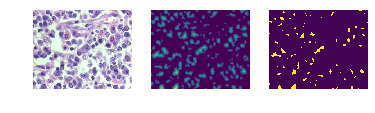

In [3]:
#使用距离变换函数cv2.distanceTransform()计算衣服图像的确定前景
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("cells.jpg",-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
dis_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,fore=cv2.threshold(dis_transform,0.4*dis_transform.max(),255,0)
plt.subplot(131)
plt.imshow(ishow)
plt.axis("off")
plt.subplot(132)
plt.imshow(dis_transform)
plt.axis("off")
plt.subplot(133)
plt.imshow(fore)
plt.axis("off")
cv2.imshow("original",ishow)
cv2.imshow("dis_transform",dis_transform)
cv2.imshow("fore",fore)
cv2.waitKey()
cv2.destroyAllWindows()

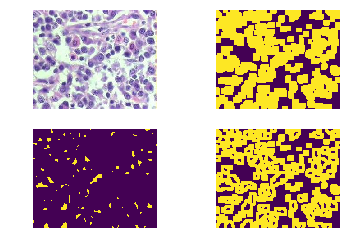

In [4]:
#确定未知区域（原始图像-确定背景-确定前景）
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("cells.jpg",-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
bg=cv2.dilate(opening,kernel,iterations=3)
dist=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,fore=cv2.threshold(dist,0.4*dist.max(),255,0)
fore=np.uint8(fore)
un=cv2.subtract(bg,fore)
plt.subplot(221)
plt.imshow(ishow)
plt.axis("off")
plt.subplot(222)
plt.imshow(bg)
plt.axis("off")
plt.subplot(223)
plt.imshow(fore)
plt.axis("off")
plt.subplot(224)
plt.imshow(un)
plt.axis("off")
cv2.imshow("original",ishow)
cv2.imshow("bg",bg)
cv2.imshow("fore",fore)
cv2.imshow("unknow",un)
cv2.waitKey()
cv2.destroyAllWindows()

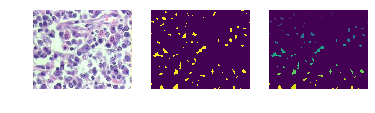

In [5]:
#使用函数cv2.connectedComponents()标注一幅图像
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("cells.jpg",-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,fore=cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
fore=np.uint8(fore)
ret,marker=cv2.connectedComponents(fore)
plt.subplot(131)
plt.imshow(ishow)
plt.axis("off")
plt.subplot(132)
plt.imshow(fore)
plt.axis("off")
plt.subplot(133)
plt.imshow(marker)
plt.axis("off")
cv2.imshow("original",ishow)
cv2.imshow("fore",fore)
cv2.imshow("marker",marker)
cv2.waitKey()
cv2.destroyAllWindows()

(-0.5, 274.5, 219.5, -0.5)

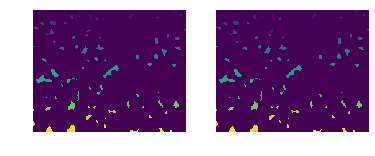

In [6]:
#使用函数cv2.connectedComponents()标注一幅图像，并对其进行修正，使未知区域被标注为0
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("cells.jpg",-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
bg=cv2.dilate(opening,kernel,iterations=3)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,fore=cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
fore=np.uint8(fore)
un=cv2.subtract(bg,fore)
ret,marker1=cv2.connectedComponents(fore)
ret,marker2=cv2.connectedComponents(fore)
marker2=marker2+1
marker[un==255]=0                                    
plt.subplot(121)
plt.imshow(marker1)
plt.axis("off")
plt.subplot(122)
plt.imshow(marker1)
plt.axis("off")

(-0.5, 274.5, 219.5, -0.5)

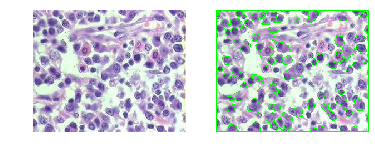

In [7]:
#使用函数cv2.watershed()分水岭算法对一幅图像进行分割
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("cells.jpg",-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
bg=cv2.dilate(opening,kernel,iterations=3)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,fore=cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
fore=np.uint8(fore)
un=cv2.subtract(bg,fore)
ret,markers=cv2.connectedComponents(fore)
markers=markers+1
markers[un==255]=0
markers=cv2.watershed(img,markers)
img[markers==-1]=[0,255,0]
plt.subplot(121)
plt.imshow(ishow)
plt.axis("off")
plt.subplot(122)
plt.imshow(img)
plt.axis("off")

(-0.5, 299.5, 299.5, -0.5)

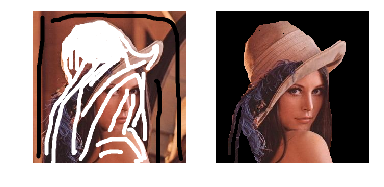

In [8]:
#17.2 交互式前景提取
#在GrabCut算法中使用模板提取图像的前景，并观察提取效果
import cv2
import numpy as np
from matplotlib import pyplot as plt
o=cv2.imread("lena.png",-1)
orgb=cv2.cvtColor(o,cv2.COLOR_BGR2RGB)
mask=np.zeros(o.shape[:2],np.uint8)
bdg=np.zeros((1,65),np.float64)
fdg=np.zeros((1,65),np.float64)
rect=(50,50,400,500)
cv2.grabCut(o,mask,rect,bdg,fdg,5,cv2.GC_INIT_WITH_RECT)
mask2=cv2.imread("lena_mask1.png",0)
mask2show=cv2.imread("lena_mask1.png",-1)
m2rgb=cv2.cvtColor(mask2show,cv2.COLOR_BGR2RGB)
mask[mask2==0]=0
mask[mask2==255]=1
mask,bgd,fgd=cv2.grabCut(o,mask,None,bdg,fdg,5,cv2.GC_INIT_WITH_MASK)
mask=np.where((mask==2)|(mask==0),0,1).astype("uint8")
ogc=o*mask[:,:,np.newaxis]
ogc=cv2.cvtColor(ogc,cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(m2rgb)
plt.axis("off")
plt.subplot(122)
plt.imshow(ogc)
plt.axis("off")

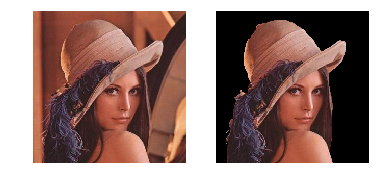

In [9]:
#在GrabCut算法中直接使用自定义模板提取图像前景
import cv2
import numpy as np
from matplotlib import pyplot as plt
o=cv2.imread("lena.png",-1)
orgb=cv2.cvtColor(o,cv2.COLOR_BGR2RGB)
bdg=np.zeros((1,65),np.float64)
fdg=np.zeros((1,65),np.float64)
mask2=np.zeros(o.shape[:2],np.uint8)
#先将掩模的值全部构造为0（确定背景），在后续步骤中，再根据需要修改其中部分值
mask2[15:512,20:270]=3   #lena头像的可能区域
mask2[25:300,100:150]=1  #lena头像的确定区域，如果不设置这个区域，头像的提取不完整
cv2.grabCut(o,mask2,None,bgd,fgd,5,cv2.GC_INIT_WITH_MASK)
mask2=np.where((mask2==2)|(mask2==0),0,1).astype("uint8")
ogc=o*mask2[:,:,np.newaxis]
ogc=cv2.cvtColor(ogc,cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(orgb)
plt.axis("off")
plt.subplot(122)
plt.imshow(ogc)
plt.axis("off")
cv2.imshow("original",o)
cv2.imshow("result",ogc)
cv2.waitKey()
cv2.destroyAllWindows()